In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time

In [2]:
filename1 = pd.read_csv("fashion-mnist_train.csv")
train = filename1.as_matrix()

train_y = train[:,0].astype('int8')
train_x = train[:,1:].astype('float64')

train = None

print("Shape Train Images: (%d,%d)" % train_x.shape)
print("Shape Labels: (%d)" % train_y.shape)

Shape Train Images: (60000,784)
Shape Labels: (60000)


In [3]:
filename2 = pd.read_csv("fashion-mnist_test_without_labels.csv")
test = filename2.as_matrix().astype('float64')
print("Shape Test Images: (%d,%d)" % test.shape)

Shape Test Images: (10000,784)


In [4]:
filename1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
filename2.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalization:
    The values of images intensity which varies from 0-255 are
    converted into 0-1 range using normalization

In [6]:
def normalization(x, mu, sigma):
    
    x_norm = np.zeros_like(x)

    for n in range(len(x)):
        for j in range(len(x[n])):
            if(sigma[j]!=0):
                x_norm[n,j] = (x[n,j] - mu[j]) / sigma[j]
            else:
                x_norm[n,j] = 0
                    
    return x_norm

In [7]:
mu = np.mean(train_x, axis=0)
sigma = np.max(train_x, axis=0)-np.min(train_x, axis=0)

In [8]:
test = normalization(test, mu, sigma)

In [9]:
train_x = normalization(train_x,mu, sigma)

In [10]:
print("Test Min: %.2f" % np.min(test))
print("Test Max: %.2f" % np.max(test))
print("Train Min: %.2f" % np.min(train_x))
print("Train Max: %.2f" % np.max(train_x))

Test Min: -0.63
Test Max: 1.31
Train Min: -0.63
Train Max: 1.00


One HOT Encoding.....

In [11]:
train_y = pd.get_dummies(train_y).as_matrix()
print(train_y)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]]


Visualization of Data

In [12]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

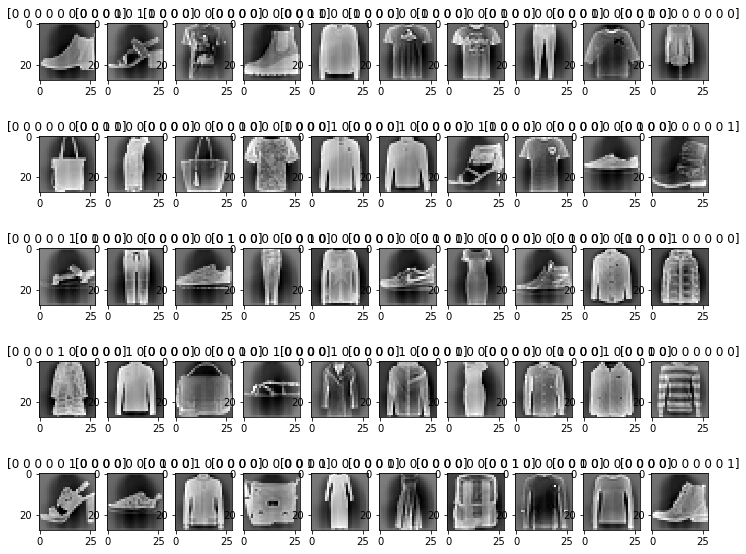

In [13]:
%matplotlib inline
plt.figure(figsize=(12,10))

y, x = 5,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    ni = np.random.randint(0,train_x.shape[0],1)[0]
    show_image(train_x[ni],(28,28), train_y[ni], cmp="gray")
plt.show()

In [14]:
def ReLu(x, derivative=False):
    if(derivative==False):
        return x*(x > 0)
    else:
        return 1*(x > 0)

In [15]:
def Softmax(x):
    x -= np.max(x)
    sm = (np.exp(x).T / np.sum(np.exp(x),axis=1)).T
    return sm

In [16]:
def CreateWeights():    
    ninputs = 784
    h1 = 50 ##Number of neurons in the first hidden layer
    h2 = 50 ##Number of neurons in the second hidden layer
    nclass = 10 ##Numer of the class, in this case it is the number of the digits.
    
    #hidde_Layer1
    w1 = np.random.normal(0, ninputs**-0.5, [ninputs,h1])
    b1 = np.random.normal(0, ninputs**-0.5, [1,h1])
    
    #hidden_Layer2
    w2 = np.random.normal(0, h1**-0.5, [h1,h2])
    b2 = np.random.normal(0, h1**-0.5, [1,h2])

    #Output_Layer3
    w3 = np.random.normal(0, h2**-0.5, [h2,nclass])
    b3 = np.random.normal(0, h2**-0.5, [1,nclass])
    
    return [w1,w2,w3,b1,b2,b3]

In [17]:
def predict(weights,x):
    
    w1,w2,w3,b1,b2,b3  = weights 
    
    #1-Hidden Layer
    first = ReLu(x@w1+b1)

    #2-Hidden Layer
    second = ReLu(first@w2+b2)
    
    #Output Layer
    return [first, second, Softmax(second@w3+b3)]

Cross Entropy Loss

In [18]:
def log2(x):
    if(x!=0):
        return np.log(x)
    else:
        return -np.inf
    
def log(y):
    return [[log2(nx) for nx in x]for x in y]

def cost(Y_predict, Y_right, weights, nabla):
    w1,w2,w3,b1,b2,b3  = weights
    weights_sum_square = np.mean(w1**2) + np.mean(w2**2) + np.mean(w3**2)
    Loss = -np.mean(Y_right*log(Y_predict) + (1-Y_right)*log(1-Y_predict)) + nabla/2 *  weights_sum_square
    return Loss

In [19]:
def accuracy(output, y):
    hit = 0
    output = np.argmax(output, axis=1)
    y = np.argmax(y, axis=1)
    for y in zip(output, y):
        if(y[0]==y[1]):
            hit += 1

    p = (hit*100)/output.shape[0]
    return p

Cross Validation

In [20]:
porcent_valid = 0.1
VALID_SIZE = round(train_x.shape[0]*porcent_valid)

index_data = np.arange(train_x.shape[0])
np.random.shuffle(index_data)

x_train = train_x[index_data[VALID_SIZE:]]
x_valid = train_x[index_data[:VALID_SIZE]]


d_train = train_y[index_data[VALID_SIZE:]]
d_valid = train_y[index_data[:VALID_SIZE]]

train_x = None
train_y = None

x_train.shape

(54000, 784)

In [21]:
x_train.shape

(54000, 784)

In [22]:
x_valid.shape

(6000, 784)

In [23]:
d_train.shape

(54000, 10)

In [24]:
d_valid.shape

(6000, 10)

In [25]:
def SGD(weights, x, t, outputs, eta, gamma, cache=None):
    
    w1,w2,w3,b1,b2,b3  = weights
    
    
    if(cache==None):
            vw1 = np.zeros_like(w1)
            vw2 = np.zeros_like(w2)
            vw3 = np.zeros_like(w3)
            vb1 = np.zeros_like(b1)
            vb2 = np.zeros_like(b2)
            vb3 = np.zeros_like(b3)
    else:
        vw1,vw2,vw3,vb1,vb2,vb3 = cache
    
    first, second, y = outputs
   
    w3_delta = (t-y)
   
    w2_error = w3_delta@w3.T
    
    w2_delta = w2_error * ReLu(second,derivative=True)

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * ReLu(first,derivative=True)
    
    eta = -eta/x.shape[0]
 
    vw3 = gamma*vw3 + eta * (second.T@w3_delta)
    vb3 = gamma*vb3 + eta * w3_delta.sum(axis=0)

    vw2 = gamma*vw2 + eta * (first.T@w2_delta)
    vb2 = gamma*vb2 + eta * w2_delta.sum(axis=0)

    vw1 = gamma*vw1 + eta * (x.T@w1_delta)
    vb1 = gamma*vb1 + eta * w1_delta.sum(axis=0)
    
    
    w3 -= vw3
    b3 -= vb3

    w2 -= vw2
    b2 -= vb2

    w1 -= vw1
    b1 -= vb1
    
    weights = [w1,w2,w3,b1,b2,b3]
    cache = [vw1,vw2,vw3,vb1,vb2,vb3]
    
    return weights, cache

In [26]:
def run(weights, x_train, y_train, x_valid, y_valid, epochs = 10, nbatchs=25, alpha = 1e-3, decay = 0, 
        momentum = 0, l2 = 0.001):
    
    pross = x_train.shape[0]*0.05
    
    history = [[],[]]
    
    index = np.arange(x_train.shape[0])
    cache = None
    print("Train data: %d" % (x_train.shape[0]))
    print("Validation data: %d \n" % (x_valid.shape[0]))
    mtime = 0
    
    r_weights = []
    max_accuracy_valid = 0
    
    for j in range(epochs):
        np.random.shuffle(index)
        t = 0
        iterations = round(x_train.shape[0]/nbatchs)
        prog = ""
        sacurr = 0
        sloss = 0
        sys.stdout.write("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        stime = 0
        timeIT = time.time()
        for i in range(iterations):
            timeI = time.time()
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]
                
            x = x_train[index[f:l]]
            y = y_train[index[f:l]]

            outputs = predict(weights,x)
            
            loss = cost(outputs[-1], y, weights, l2)
            
            
            accuracy_t = accuracy(outputs[-1], y)
            
            sacurr += accuracy_t
            sloss += loss
            
            accuracy_train = sacurr/(i+1)
            loss_train = sloss/(i+1)
            
            weights, cache = SGD(weights, x, y, outputs, alpha, momentum, cache)
            
            t+= x.shape[0]
            
            qtd = round(t/pross)
            prog = "["
            for p in range(20):
                if(p<qtd-1):
                    prog += "="
                elif(p==qtd-1):
                    prog += ">"
                else:
                    prog += "."
            prog += "]"

            
            stime += time.time()-timeI
            mtime = stime/(i+1)
            mTimeT = mtime * (iterations-i-1)
            
            sys.stdout.write("\r%5d/%5d %s ETA: %3d s - loss: %.4f  acc: %.4f" % (t, x_train.shape[0], prog, mTimeT,
                                                                                  loss_train, accuracy_train))
            
            history[0].append([loss_train, accuracy_train])
        mtime = time.time()-timeIT
        alpha = alpha - (alpha*decay)
        
        outputs = predict(weights, x_valid)
        
        loss_valid = cost(outputs[-1], y_valid, weights, l2)
        accuracy_valid = accuracy(outputs[-1], y_valid)
        
        sys.stdout.write("\r%5d/%5d %s ETA: %3d s loss: %.4f  acc: %.4f - lossValid: %.4f  accValid: %.4f " % 
                         ( t, x_train.shape[0], prog, mtime, loss_train, accuracy_train, loss_valid, accuracy_valid))
        history[1].append([loss_valid, accuracy_valid])
            
        if(accuracy_valid>=max_accuracy_valid):
            w1,w2,w3,b1,b2,b3  = weights
            r_weights = [w1.copy(),w2.copy(),w3.copy(),b1.copy(),b2.copy(),b3.copy()]
            max_accuracy_valid = accuracy_valid
        
    return r_weights, history

In [31]:
weights = CreateWeights()

alpha = 5e-2
epochs = 40
nbatchs = 100
weights, history = run(weights, 
              x_train, d_train, 
              x_valid, d_valid, 
              epochs = epochs,
              nbatchs=nbatchs, 
              alpha = alpha, 
              decay = 0.05, 
              momentum = 0.9, 
              l2 = 1e-3)

Train data: 54000
Validation data: 6000 


Epochs:  1 \ 40 
54000/54000 [===================>] ETA:   4 s loss: 0.0887  acc: 81.0556 - lossValid: 0.0731  accValid: 85.0667 
Epochs:  2 \ 40 
54000/54000 [===================>] ETA:   3 s loss: 0.0641  acc: 86.7574 - lossValid: 0.0661  accValid: 86.2500 
Epochs:  3 \ 40 
54000/54000 [===================>] ETA:   3 s loss: 0.0576  acc: 88.1667 - lossValid: 0.0664  accValid: 86.7833 
Epochs:  4 \ 40 
54000/54000 [===================>] ETA:   3 s loss: 0.0536  acc: 89.0593 - lossValid: 0.0623  accValid: 87.4167 
Epochs:  5 \ 40 
54000/54000 [===================>] ETA:   3 s loss: 0.0504  acc: 89.7389 - lossValid: 0.0705  accValid: 85.3000 
Epochs:  6 \ 40 
54000/54000 [===================>] ETA:   4 s loss: 0.0479  acc: 90.2370 - lossValid: 0.0611  accValid: 87.6333 
Epochs:  7 \ 40 
54000/54000 [===================>] ETA:   4 s loss: 0.0453  acc: 90.7963 - lossValid: 0.0594  accValid: 87.9333 
Epochs:  8 \ 40 
54000/54000 [=================

C:\Users\Hp\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


54000/54000 [===================>] ETA:   4 s loss: nan  acc: 93.2685 - lossValid: 0.0643  accValid: 87.9667 
Epochs: 15 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 93.5741 - lossValid: 0.0634  accValid: 88.2667 
Epochs: 16 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 93.8704 - lossValid: 0.0647  accValid: 88.1167 
Epochs: 17 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 94.0796 - lossValid: 0.0681  accValid: 87.5833 
Epochs: 18 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 94.2759 - lossValid: 0.0665  accValid: 87.6667 
Epochs: 19 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 94.5537 - lossValid: 0.0674  accValid: 87.4833 
Epochs: 20 \ 40 
54000/54000 [===================>] ETA:   3 s loss: nan  acc: 94.8796 - lossValid: nan  accValid: 88.1000 
Epochs: 21 \ 40 
54000/54000 [===================>] ETA:   4 s loss: nan  acc: 94.8833 - lossValid: nan  accValid: 88.1167 
Epochs:

In [32]:
weights1 = np.array(weights[0])
weights1

array([[ 0.02204713,  0.02869855, -0.03308199, ..., -0.02196737,
         0.00175591, -0.02977638],
       [ 0.00541077, -0.02902929,  0.0059604 , ..., -0.00653624,
         0.00061079,  0.00703157],
       [ 0.02225602,  0.0417172 , -0.09034516, ..., -0.00216611,
        -0.02679031, -0.01630787],
       ...,
       [ 0.01292417,  0.00347961,  0.03407211, ..., -0.01955458,
        -0.06592558,  0.0136785 ],
       [ 0.03974548, -0.04999571, -0.0699389 , ..., -0.13357248,
         0.01904417,  0.11182467],
       [-0.00261431, -0.01377796, -0.00694452, ...,  0.06296485,
         0.05955365,  0.0156297 ]])

In [33]:
weights2 = np.array(weights[1])
weights2

array([[-0.43068023, -0.22908993,  0.42859879, ..., -0.23392699,
        -0.00587786,  0.1626071 ],
       [ 0.02263666,  0.59149945,  0.12362758, ...,  0.00851698,
        -0.41690198, -0.06296741],
       [-0.04610898, -0.19306435, -0.54114201, ..., -0.26656318,
         0.14572262, -0.23723577],
       ...,
       [ 0.00621253,  0.67169602, -0.26806751, ...,  0.13971812,
        -0.15326202, -0.06714792],
       [ 0.19049764,  0.07232291, -0.19791052, ...,  0.35130712,
         0.06629009, -0.14298025],
       [ 0.15198011, -0.49591006, -0.66909092, ..., -0.07612801,
        -0.20400838,  0.09613326]])

In [34]:
weights3 = np.array(weights[2])
weights3

array([[ 2.82131528e-01, -6.62645826e-01,  2.92273029e-01,
        -9.89381733e-01,  3.98348809e-01,  5.66137671e-02,
         6.91278523e-01,  8.82901967e-02,  2.10827540e-01,
        -8.54909452e-01],
       [ 7.85249632e-01, -1.15916424e-01,  4.81533324e-01,
         7.00767251e-01, -5.19637086e-01, -6.31223659e-01,
         1.00281082e+00, -4.45195531e-01, -3.71945422e-01,
        -4.26513780e-01],
       [ 3.63261226e-01, -3.14774547e-01,  9.83503851e-01,
         5.56020223e-01, -5.04669186e-01, -1.32871854e-01,
        -1.79117725e-01, -4.52181732e-02, -1.46477328e-01,
        -2.87923717e-01],
       [-5.00279522e-01, -2.81252019e-01, -4.48697211e-01,
         9.47314509e-01,  4.09206255e-01, -6.14461182e-01,
        -2.34469342e-01,  5.36542896e-01,  3.51803675e-01,
        -2.60080959e-01],
       [ 1.25394024e-02,  7.61388586e-01,  2.25041110e-01,
        -2.15562119e-01, -9.31005016e-01,  6.58865203e-01,
        -3.07363355e-01, -4.98627895e-01,  3.02910525e-01,
         3.

In [35]:
biases1 = np.array(weights[3])
biases1

array([[-0.21430033, -0.7402713 , -0.19641928, -0.46416949, -0.84620732,
        -0.28016326, -0.36608585, -0.49714964, -0.18932119, -0.27523614,
        -0.24041662,  0.21933197, -0.67193172, -0.48083016, -0.69031133,
        -0.12183807, -0.37690118, -0.40935668, -0.24239962, -0.68752279,
        -0.22634265, -0.29283859, -0.15200986, -0.28971563, -0.31531155,
        -0.44632917, -0.65003591, -0.31199447, -0.35728968, -0.29532951,
        -0.29116108, -0.3766561 , -0.44371304, -0.27500236, -0.21912238,
         0.02178069, -0.60834852, -0.10650334, -0.19041894, -0.4111002 ,
         0.12949289, -0.34720577, -0.47054967, -0.69108188, -0.61901373,
        -0.33293399, -0.32353643, -0.17446298, -0.04007832, -0.28829349]])

In [36]:
biases2 = np.array(weights[4])
biases2

array([[ 0.38761539,  0.44752341,  0.07967314,  0.21014313, -0.10406204,
        -0.42153541, -0.31979277, -0.2567583 , -0.06242789, -0.12981068,
         0.59349988, -0.3068325 ,  0.23161696,  0.63041673,  0.20701146,
         0.50275569, -0.16127022, -0.17567821, -0.17238689, -0.12157462,
         0.4896984 , -0.46169453, -0.02585503, -0.11327248, -0.13973924,
        -0.10915651, -0.09243946, -0.30582722,  0.30609783,  0.18290224,
        -0.43806399,  0.33151167,  0.07997702, -0.32910741, -0.10606672,
         0.14580645,  0.13578889, -0.02023875,  0.37187802,  0.04520999,
        -0.11349272,  0.52220334, -0.01682556, -0.18228053, -0.19327376,
         0.1667849 ,  0.14710727,  0.2033013 , -0.14433671,  0.16912831]])

In [37]:
biases3 = np.array(weights[5])
biases3

array([[-0.28035853, -0.23313967,  0.86766389,  0.35299959,  0.54939168,
        -0.65500891,  0.10308535, -0.11086849,  0.54745114, -0.54670774]])

In [38]:
train_history = np.array(history[0])
t_loss = train_history[:,:1]
t_acc = train_history[:,1:2]

In [39]:
valid_history = np.array(history[1])
train_history.shape
v_loss = valid_history[:,:1]
v_acc = valid_history[:,1:2]

In [42]:
train_history.shape

(21600, 2)

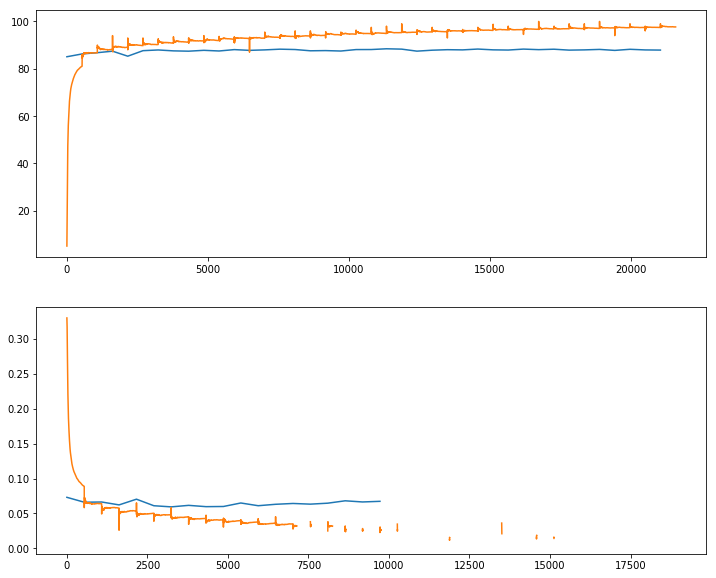

In [43]:
plt.figure(figsize=(12,10))

plt.subplot(2, 1, 1)
x = np.arange(epochs)*int(x_train.shape[0]/nbatchs)
plt.plot(x,v_acc)
plt.plot(t_acc)

plt.subplot(2, 1, 2)
plt.plot(x,v_loss)
plt.plot(t_loss)

plt.show()

In [44]:
w1,w2,w3,b1,b2,b3  = weights

In [45]:
outputs = predict(weights, test)

In [46]:
d = np.argmax(outputs[-1],axis=1)
d

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

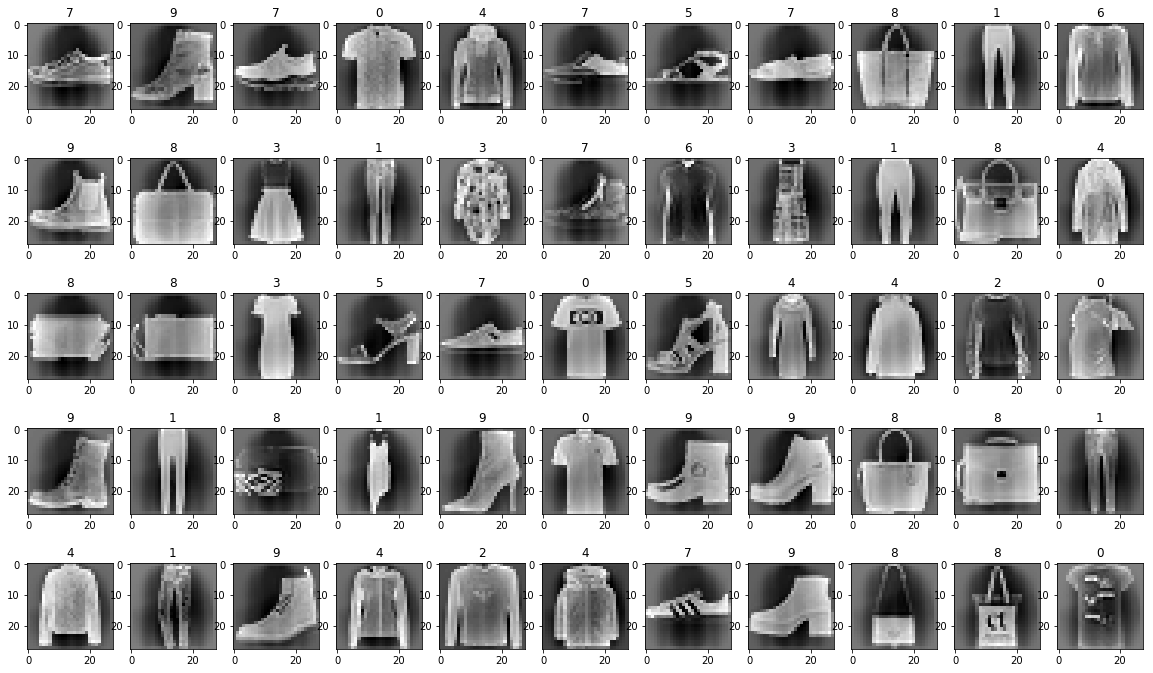

In [47]:
%matplotlib inline
plt.figure(figsize=(20,12))

y, x = 5,11
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    ni = np.random.randint(0,test.shape[0],1)[0]
    v = str(d[ni])
    show_image(test[ni],(28,28), v, cmp="gray")
plt.show()

In [49]:
#ImageId,Label

pd.DataFrame({"ImageId": list(range(1,len(d)+1)), "Label": d}).to_csv('output.csv', index=False, header=True)